# Testing different configurations while using Lagorce's online clustering

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd '../HOTS'

/Users/joe/Documents/boulot/git/homhots/HOTS/HOTS


In [2]:
import numpy as np
import matplotlib.pyplot as plt

import os
from ToolsMonitor import GenerateActivationMap, DisplayActivationMap
from Event import Event, SimpleAlphabet
from STS import STS
from Layer import ClusteringLayer
from ToolsMonitor import (
    DisplayImage,
    DisplaySurface3D,
    DisplaySurface2D,
    DisplayConvergence,
)
from Tools import SaveObject, LoadObject
from Classifier import Classifier
from Network import Network
from KmeansLagorce import KmeansLagorce

# Defining Common parameter

In [3]:
tau = 0.02
R = 2
nb_cluster = [4, 8, 16]
ImageSize = (32, 32)
DataPath = "../Data/alphabet_ExtractedStabilized.mat"
LabelPath = "../Data/alphabet_label.pkl"
#%mkdir -p Records/EXP_01_LagorceKmeans

# Experiment with one polarity in input  

In [4]:
event_tr, event_te, event_cl, label_tr, label_te = SimpleAlphabet(
    NbTrainingData=36,
    NbTestingData=40,
    Path=DataPath,
    LabelPath=LabelPath,
    ClusteringData=[1, 32, 19, 22, 29],
    OutOnePolarity=True,
    verbose=0,
)

## Exp1 :  Lagorce Kmeans + Linear Kernel +  NoiseFilter(=2)  +  1 Polarity in Input + 3 Cycles

220842it [01:44, 2103.81it/s]                          
219987it [02:04, 1760.75it/s]                          
219189it [06:50, 533.61it/s]                          


[[  42 1703 1058 2642 1436  792  334 1077 1789  272  784 1540  384  163
    99  251]
 [1875  369  927  123   38   45  642  273 2098 1669    7    0  473  921
   637  987]
 [ 906  423  271  745 1140  793  877  545   28  499  388  736  336  804
   602  846]
 [ 462  493 2037  896  800  983 1061  315 1651 1111  645 1019 1085  477
   741 1417]
 [ 284 1044 1749 2106  298   82  141   54 2263   96  785 1685  211  326
   275 2361]
 [1969  195  481   65  699 2488  554  305  708 4862   24    3 2887  667
   460  367]
 [1306  383  325  791  784  387 1858  259  743 2071  546  957 1299 1286
   761  815]
 [1603    2    1    0  187 1274  776   25    0 1923    0    0 1452  594
   179    1]
 [1409  195  274   77  264  340 1851   62  595 1555  256  120  462  526
   253  209]
 [ 826  284  267  724  317 1237  533   80  556 1605  134  424  602  193
    92   25]
 [ 331 1333 1784 1231  390  143  651   42 1583  407  442  556  419  329
   166 1414]
 [1011  414  596 1276  962 1348  437 1479 1134 2333  592  665 151

FileNotFoundError: [Errno 2] No such file or directory: 'Records/EXP_01_LagorceKmeans/Exp01_2020-04-17_notrdninit.pkl'

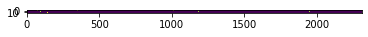

In [5]:
## Defining the network
L1 = ClusteringLayer(
    tau=tau, R=R, verbose=0, ThrFilter=2, LearningAlgo="lagorce", kernel="linear",
)
L2 = ClusteringLayer(
    tau=10 * tau,
    R=2 * R,
    verbose=0,
    ThrFilter=2,
    LearningAlgo="lagorce",
    kernel="linear",
)
L3 = ClusteringLayer(
    tau=10 * 10 * tau,
    R=2 * 2 * R,
    verbose=0,
    ThrFilter=2,
    LearningAlgo="lagorce",
    kernel="linear",
)
Net = Network([L1, L2, L3])

fname = "../Records/EXP_01_LagorceKmeans/Exp01_2020-04-17_notrdninit.pkl"
if not os.path.isfile(fname):
    #### Training The Cluster on 5 images
    ClusterLayer, event_output = Net.TrainCluster(
        event=event_cl, NbClusterList=nb_cluster, to_record=True, NbCycle=3
    )
    ## Generating histogram for training samples
    event0_o_tr = Net.RunNetwork(event_tr, NbClusterList=ClusterLayer, homrun=False)
    ## Generating histogram for the test samples
    event0_o_te = Net.RunNetwork(event_te, NbClusterList=ClusterLayer, homrun=False)
    Classif0 = Classifier(
        event0_o_tr, event0_o_te, TrainingLabel=label_tr, GroundTruth=label_te
    )
    prediction, accuracy, method = Classif0.HistogramDistance(to_print=True)
    SaveObject([ClusterLayer, Classif0], fname)
else:
    ClusterLayer, Classif0 = LoadObject(fname)
    prediction, accuracy, method = Classif0.HistogramDistance(to_print=True)

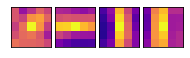

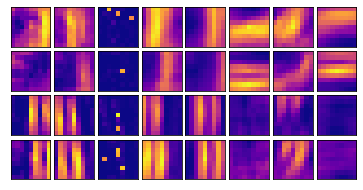

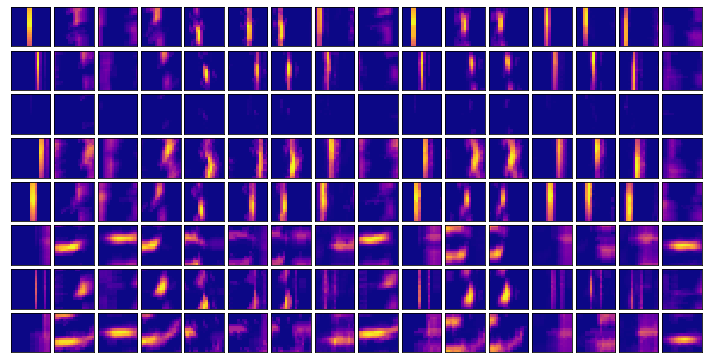

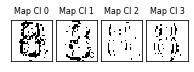

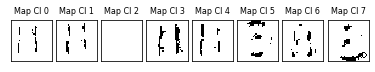

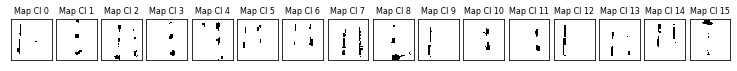

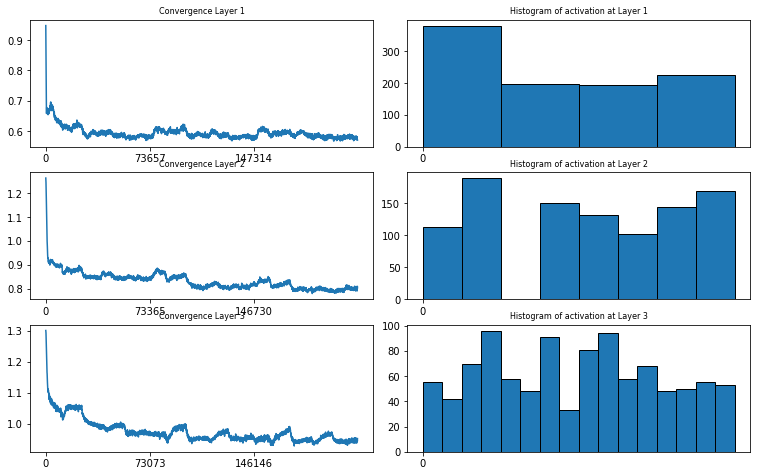

In [7]:
DisplaySurface2D(ClusterLayer[0].prototype, nb_polarities=1)
DisplaySurface2D(ClusterLayer[1].prototype, nb_polarities=4)
DisplaySurface2D(ClusterLayer[2].prototype, nb_polarities=8)
event_to_show = Event(ImageSize=(32, 32), ListPolarities=[-1, 1], OutOnePolarity=True)
event_to_show.LoadFromMat("../Data/alphabet_ExtractedStabilized.mat", image_number=22)
Net.RunNetwork(event_to_show, NbClusterList=ClusterLayer)
mapL1 = GenerateActivationMap(Net.Layers[0].output, ClusterLayer[0])
DisplayActivationMap(mapL1, scale=2)
mapL2 = GenerateActivationMap(Net.Layers[1].output, ClusterLayer[1])
DisplayActivationMap(mapL2, scale=2)
mapL3 = GenerateActivationMap(Net.Layers[2].output, ClusterLayer[2])
DisplayActivationMap(mapL3, scale=2)

DisplayConvergence(ClusterLayer, to_display=["error", "histo"])

## Exp2 : Lagorce Kmeans + Exp Kernel + NoiseFilter(=2) +  1 Polarity in Input + 3 Cycles

In [7]:
## Defining the network
L1 = ClusteringLayer(
    tau=tau, R=R, verbose=0, ThrFilter=2, LearningAlgo="lagorce", kernel="exponential"
)
L2 = ClusteringLayer(
    tau=10 * tau,
    R=2 * R,
    verbose=0,
    ThrFilter=2,
    LearningAlgo="lagorce",
    kernel="exponential"
)
L3 = ClusteringLayer(
    tau=10 * 10 * tau,
    R=2 * 2 * R,
    verbose=0,
    ThrFilter=2,
    LearningAlgo="lagorce",
    kernel="exponential"
)
Net = Network([L1, L2, L3])

fname = "Records/EXP_01_LagorceKmeans/Exp02_2020-04-17_notrdninit.pkl"
if not os.path.isfile(fname):
    #### Training The Cluster on 5 images
    ClusterLayer, event_output = Net.TrainCluster(
        event=event_cl, NbClusterList=nb_cluster, to_record=True, NbCycle=3
    )

    ## Generating histogram for training samples
    event0_o_tr = Net.RunNetwork(event_tr, NbClusterList=ClusterLayer, homrun=False)

    ## Generating histogram for the test samples
    event0_o_te = Net.RunNetwork(event_te, NbClusterList=ClusterLayer, homrun=False)

    Classif0 = Classifier(
        event0_o_tr, event0_o_te, TrainingLabel=label_tr, GroundTruth=label_te
    )

    prediction, accuracy, method = Classif0.HistogramDistance(to_print=True)

    SaveObject([ClusterLayer, Classif0], fname)
else:
    ClusterLayer, Classif0 = LoadObject(fname)
    prediction, accuracy, method = Classif0.HistogramDistance(to_print=True)
    

battacha:92.5% ### normalized:95.0% ### euclidian:95.0% ### 


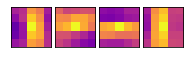

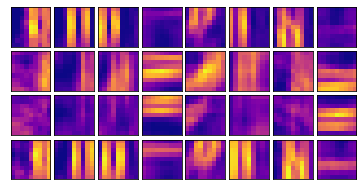

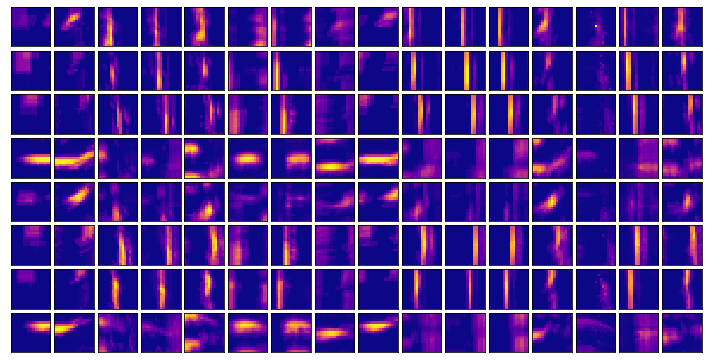

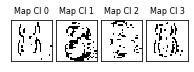

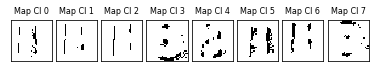

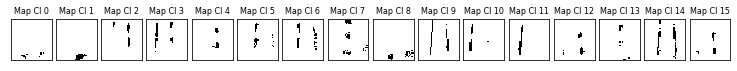

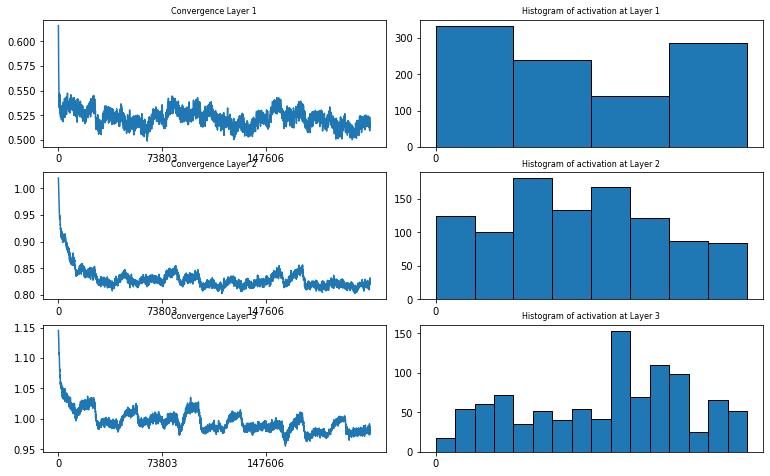

In [8]:
DisplaySurface2D(ClusterLayer[0].prototype, nb_polarities=1)
DisplaySurface2D(ClusterLayer[1].prototype, nb_polarities=4)
DisplaySurface2D(ClusterLayer[2].prototype, nb_polarities=8)
event_to_show = Event(ImageSize=(32, 32), ListPolarities=[-1, 1], OutOnePolarity=True)
event_to_show.LoadFromMat("Data/alphabet_ExtractedStabilized.mat", image_number=22)
Net.RunNetwork(event_to_show, NbClusterList=ClusterLayer)
mapL1 = GenerateActivationMap(Net.Layers[0].output, ClusterLayer[0])
DisplayActivationMap(mapL1, scale=2)
mapL2 = GenerateActivationMap(Net.Layers[1].output, ClusterLayer[1])
DisplayActivationMap(mapL2, scale=2)
mapL3 = GenerateActivationMap(Net.Layers[2].output, ClusterLayer[2])
DisplayActivationMap(mapL3, scale=2)

DisplayConvergence(ClusterLayer, to_display=["error", "histo"])

# Experiment with 2 polarity in Input 

## Exp3 : Lagorce Kmeans + Linear Kernel + NoiseFilter(=2) + 2 Polarity in Input + 3 Cycles

In [9]:
save_exp = False
event_tr, event_te, event_cl, label_tr, label_te = SimpleAlphabet(
    NbTrainingData=36,
    NbTestingData=40,
    Path=DataPath,
    LabelPath=LabelPath,
    ClusteringData=[1, 32, 19, 22, 29],
    OutOnePolarity=False,
    verbose=0,
)

## Defining the network
L1 = ClusteringLayer(
    tau=tau, R=R, verbose=0, ThrFilter=2, LearningAlgo="lagorce", kernel="linear", sigma=0.6
)
L2 = ClusteringLayer(
    tau=10 * tau,
    R=2 * R,
    verbose=0,
    ThrFilter=2,
    LearningAlgo="lagorce",
    kernel="linear", sigma=0.6
)
L3 = ClusteringLayer(
    tau=10 * 10 * tau,
    R=2 * 2 * R,
    verbose=0,
    ThrFilter=2,
    LearningAlgo="lagorce",
    kernel="linear", sigma=0.6
)
Net = Network([L1, L2, L3])

fname = "Records/EXP_01_LagorceKmeans/Exp03_2020-04-17_notrdninit.pkl"
if not os.path.isfile(fname):
    #### Training The Cluster on 5 images
    ClusterLayer, event_output = Net.TrainCluster(
        event=event_cl, NbClusterList=nb_cluster, to_record=True, NbCycle=3
    )
    ## Generating histogram for training samples
    event0_o_tr = Net.RunNetwork(event_tr, NbClusterList=ClusterLayer, homrun=False)
    ## Generating histogram for the test samples
    event0_o_te = Net.RunNetwork(event_te, NbClusterList=ClusterLayer, homrun=False)
    Classif0 = Classifier(
        event0_o_tr, event0_o_te, TrainingLabel=label_tr, GroundTruth=label_te
    )
    prediction, accuracy, method = Classif0.HistogramDistance(to_print=True)
    SaveObject([ClusterLayer, Classif0], fname)
else:
    ClusterLayer, Classif0 = LoadObject(fname)
    prediction, accuracy, method = Classif0.HistogramDistance(to_print=True)
    

battacha:95.0% ### normalized:95.0% ### euclidian:95.0% ### 


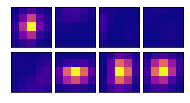

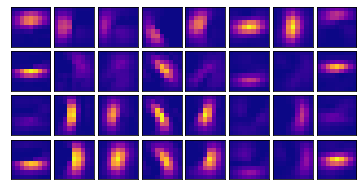

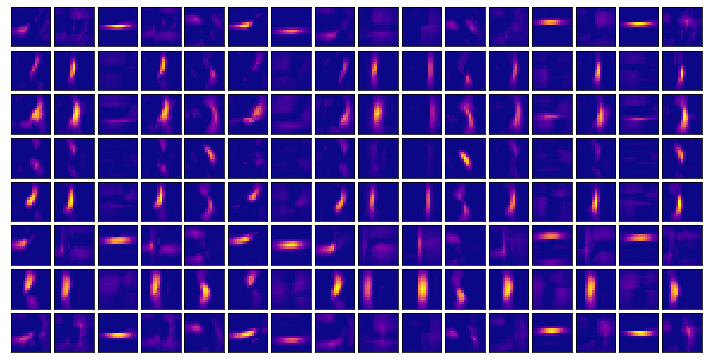

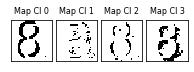

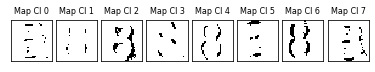

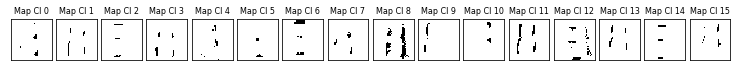

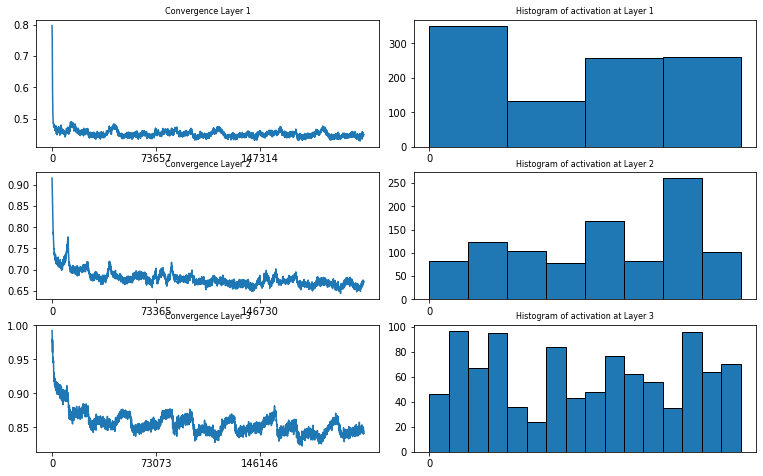

In [10]:
DisplaySurface2D(ClusterLayer[0].prototype, nb_polarities=2)
DisplaySurface2D(ClusterLayer[1].prototype, nb_polarities=4)
DisplaySurface2D(ClusterLayer[2].prototype, nb_polarities=8)
event_to_show = Event(ImageSize=(32, 32), ListPolarities=[-1, 1], OutOnePolarity=False)
event_to_show.LoadFromMat("Data/alphabet_ExtractedStabilized.mat", image_number=22)
Net.RunNetwork(event_to_show, NbClusterList=ClusterLayer)
mapL1 = GenerateActivationMap(Net.Layers[0].output, ClusterLayer[0])
DisplayActivationMap(mapL1, scale=2)
mapL2 = GenerateActivationMap(Net.Layers[1].output, ClusterLayer[1])
DisplayActivationMap(mapL2, scale=2)
mapL3 = GenerateActivationMap(Net.Layers[2].output, ClusterLayer[2])
DisplayActivationMap(mapL3, scale=2)

DisplayConvergence(ClusterLayer, to_display=["error", "histo"])

## Exp4 : Lagorce Kmeans + Exp Kernel + NoiseFilter(=2) + 2 Polarity in Input + 3 Cycles

In [11]:
%mkdir -p Records/EXP_01_LagorceKmeans

In [6]:
event_tr, event_te, event_cl, label_tr, label_te = SimpleAlphabet(
    NbTrainingData=36,
    NbTestingData=40,
    Path=DataPath,
    LabelPath=LabelPath,
    ClusteringData=[1, 32, 19, 22, 29],
    OutOnePolarity=False,
    verbose=0,
)
## Defining the network
L1 = ClusteringLayer(
    tau=tau, R=R, verbose=0, ThrFilter=2, LearningAlgo="lagorce", kernel="exponential", homeo=False
)
L2 = ClusteringLayer(
    tau=10 * tau,
    R=2 * R,
    verbose=0,
    ThrFilter=2,
    LearningAlgo="lagorce",
    kernel="exponential",
    homeo=False
)
L3 = ClusteringLayer(
    tau=10 * 10 * tau,
    R=2 * 2 * R,
    verbose=0,
    ThrFilter=2,
    LearningAlgo="lagorce",
    kernel="exponential",
    homeo=False
)
Net = Network([L1, L2, L3])

fname = "Records/EXP_01_LagorceKmeans/Exp04_2020-10-09_homeo_notrdninit.pkl"
if not os.path.isfile(fname):
    #### Training The Cluster on 5 images
    ClusterLayer, event_output = Net.TrainCluster(
        event=event_cl, NbClusterList=nb_cluster, to_record=True, NbCycle=3
    )

    ## Generating histogram for training samples
    event0_o_tr = Net.RunNetwork(event_tr, NbClusterList=ClusterLayer, homrun=False)

    ## Generating histogram for the test samples
    event0_o_te = Net.RunNetwork(event_te, NbClusterList=ClusterLayer, homrun=False)

    Classif0 = Classifier(
        event0_o_tr, event0_o_te, TrainingLabel=label_tr, GroundTruth=label_te
    )

    prediction, accuracy, method = Classif0.HistogramDistance(to_print=True)
    SaveObject([ClusterLayer, Classif0], fname)
else:
    ClusterLayer, Classif0 = LoadObject(fname)
    prediction, accuracy, method = Classif0.HistogramDistance(to_print=True)

221391it [01:43, 2148.89it/s]                          
221391it [02:00, 1838.61it/s]                          
221391it [08:08, 452.88it/s]                          


[[ 2966   518    29     6    32  4546   353    63  3493  1782     1   170
    567     1     0     1]
 [  985  2164    11     1    13   119  1471    23  2164  1760     0  1694
    577     0   260     2]
 [ 2700    81    18     4    25  1743   111    40  2825  1377     0   318
    784     0    19     2]
 [ 2252  1780    13     4    21  1105  2066    40  2451  3409     0  1944
    279     0     3     1]
 [ 1098  1861    22     7    13  3084  1509    24  2304   143     5  2617
    319     0   895     1]
 [ 1403   798    20     7    37  1017   757    32  4744  6978     1   599
    483     1    25     6]
 [ 3374   755    14     4    19  1206   714    37  3263  3715     1   799
    742     0    60     2]
 [  931     4     9     1    16   433    16    24  3070  3303     0     1
    273     1     0     3]
 [ 2195   706    12     0     2    17   293     0   307    24  2160     0
   1776     2   398   655]
 [  921   541    17     2    17   832   209    24  2493  2364     0   302
    194     0   1

FileNotFoundError: [Errno 2] No such file or directory: 'Records/EXP_01_LagorceKmeans/Exp04_2020-10-09_homeo_notrdninit.pkl'

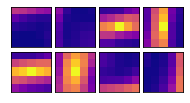

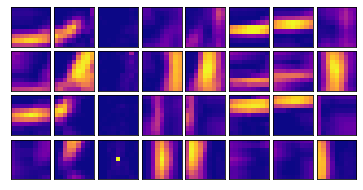

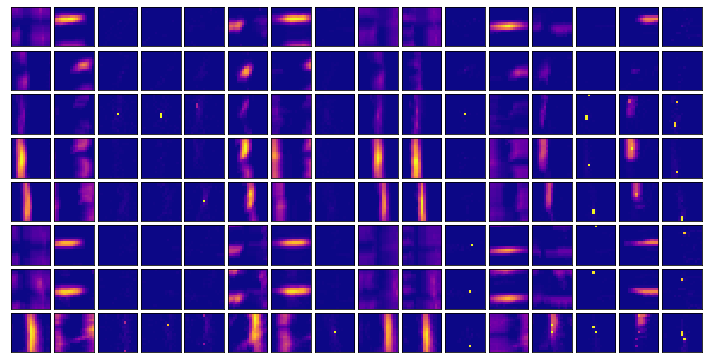

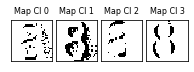

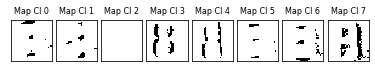

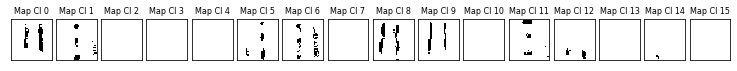

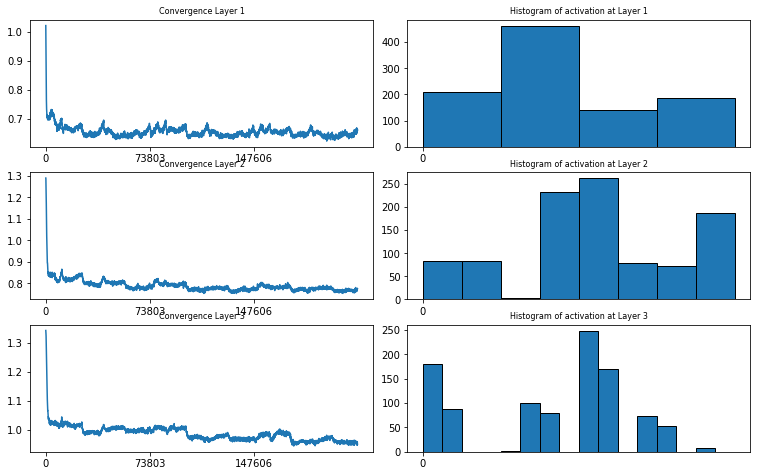

In [7]:
DisplaySurface2D(ClusterLayer[0].prototype, nb_polarities=2)
DisplaySurface2D(ClusterLayer[1].prototype, nb_polarities=4)
DisplaySurface2D(ClusterLayer[2].prototype, nb_polarities=8)
event_to_show = Event(ImageSize=(32, 32), ListPolarities=[-1, 1], OutOnePolarity=False)
event_to_show.LoadFromMat("../Data/alphabet_ExtractedStabilized.mat", image_number=22)
Net.RunNetwork(event_to_show, NbClusterList=ClusterLayer)
mapL1 = GenerateActivationMap(Net.Layers[0].output, ClusterLayer[0])
DisplayActivationMap(mapL1, scale=2)
mapL2 = GenerateActivationMap(Net.Layers[1].output, ClusterLayer[1])
DisplayActivationMap(mapL2, scale=2)
mapL3 = GenerateActivationMap(Net.Layers[2].output, ClusterLayer[2])
DisplayActivationMap(mapL3, scale=2)

DisplayConvergence(ClusterLayer, to_display=["error", "histo"])